In [27]:
import pandas as pd
import glob

# 현재 폴더에 있는 모든 엑셀 파일(.xlsx)의 목록을 가져옵니다.
# 만약 이 코드를 여러 번 실행해서 '통합_데이터.xlsx' 파일이 이미 있다면, 목록에서 제외합니다.
file_list = glob.glob('*.xlsx')
file_list = [file for file in file_list if not file.startswith('통합_데이터')]

# 엑셀 파일들을 저장할 빈 리스트를 만듭니다.
all_data_frames = []

# 각 엑셀 파일을 반복하면서 데이터를 읽어옵니다.
for file in file_list:
    df = pd.read_excel(file)
    all_data_frames.append(df)

# 리스트에 있는 모든 데이터프레임을 세로로 합칩니다.
# ignore_index=True 옵션은 기존 파일들의 인덱스를 무시하고 새로 인덱스를 부여합니다.
combined_df = pd.concat(all_data_frames, ignore_index=True)

# 합쳐진 데이터프레임을 '통합_데이터.xlsx'라는 새 엑셀 파일로 저장합니다.
# index=False 옵션은 데이터프레임의 인덱스를 엑셀 파일에 포함하지 않도록 합니다.
combined_df.to_excel('통합_데이터.xlsx', index=False)

print(f"총 {len(file_list)}개의 엑셀 파일이 성공적으로 합쳐져 '통합_데이터.xlsx' 파일로 저장되었습니다.")

총 14개의 엑셀 파일이 성공적으로 합쳐져 '통합_데이터.xlsx' 파일로 저장되었습니다.


In [28]:
# '환율' 컬럼의 비어있는 값을 '환율($)' 컬럼의 값으로 채웁니다.
# 예를 들어, 데이터프레임의 이름이 df라고 가정합니다.
combined_df['환율'] = combined_df['환율'].fillna(combined_df['환율($)'])

# 이제 '환율($)' 컬럼은 더 이상 필요 없으므로 삭제합니다.
combined_df.drop('환율($)', axis=1, inplace=True)

# 결과 확인: '환율' 컬럼의 정보와 전체 데이터프레임 정보를 다시 출력해봅니다.
print("✅ 컬럼이 성공적으로 병합되었습니다.")
print("\n업데이트된 '환율' 컬럼 정보:")
print(combined_df['환율'].describe())
print("\n업데이트된 데이터프레임 정보:")
combined_df.info()

✅ 컬럼이 성공적으로 병합되었습니다.

업데이트된 '환율' 컬럼 정보:
count    2214.000000
mean     1362.614092
std        78.789806
min      1185.500000
25%      1319.200000
50%      1351.300000
75%      1453.000000
max      1470.600000
Name: 환율, dtype: float64

업데이트된 데이터프레임 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2267 entries, 0 to 2266
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   기준년월               2214 non-null   object 
 1   지역                 2214 non-null   object 
 2   아파트                2214 non-null   object 
 3   공급면적(㎡)            2214 non-null   float64
 4   전용면적(㎡)            2214 non-null   float64
 5   일반분양               2214 non-null   object 
 6   특별분양               2214 non-null   object 
 7   세대수                2214 non-null   float64
 8   미분양수               2214 non-null   float64
 9   분양가(만원)            2214 non-null   float64
 10  분양률                2214 non-null   float64
 11  준공여부         

In [29]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2267 entries, 0 to 2266
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   기준년월               2214 non-null   object 
 1   지역                 2214 non-null   object 
 2   아파트                2214 non-null   object 
 3   공급면적(㎡)            2214 non-null   float64
 4   전용면적(㎡)            2214 non-null   float64
 5   일반분양               2214 non-null   object 
 6   특별분양               2214 non-null   object 
 7   세대수                2214 non-null   float64
 8   미분양수               2214 non-null   float64
 9   분양가(만원)            2214 non-null   float64
 10  분양률                2214 non-null   float64
 11  준공여부               2214 non-null   object 
 12  건설사                2214 non-null   object 
 13  금리                 2214 non-null   float64
 14  환율                 2214 non-null   float64
 15  대형마트 - 1.5km 이내    2214 non-null   float64
 16  대형쇼핑 - 3km 이내      2214 

In [30]:
combined_df.drop(columns=['Unnamed: 33', 'Unnamed: 34'], inplace=True, errors='ignore')

In [31]:
combined_df.head()

,기준년월,지역,아파트,공급면적(㎡),전용면적(㎡),일반분양,특별분양,세대수,미분양수,분양가(만원),...,어린이집,유치원,초등학교,중학교(2km 이내),고등학교(2km 이내),지하철 - 반경 1.5km 이내,버스 - 반경 500m 이내,고속철도 - 10km 이내,고속도로IC - 10km 이내,주변시세 평균
0,202504,경상남도,김해삼계푸르지오센트럴파크,107.28,84.99,58,60,118.0,29.0,49430.0,...,3.0,1.0,0.0,15.0,18.0,1.0,5.0,1.0,3.0,2.5
1,202504,경상남도,김해삼계푸르지오센트럴파크,107.29,84.98,134,134,268.0,55.0,49940.0,...,3.0,1.0,0.0,15.0,18.0,1.0,5.0,1.0,3.0,2.5
2,202504,경상남도,김해삼계푸르지오센트럴파크,107.39,84.94,14,12,26.0,19.0,47930.0,...,3.0,1.0,0.0,15.0,18.0,1.0,5.0,1.0,3.0,2.5
3,202504,경상남도,김해삼계푸르지오센트럴파크,107.75,84.95,43,44,87.0,35.0,49980.0,...,3.0,1.0,0.0,15.0,18.0,1.0,5.0,1.0,3.0,2.5
4,202504,경상남도,김해삼계푸르지오센트럴파크,139.23,110.94,113,18,131.0,80.0,65200.0,...,3.0,1.0,0.0,15.0,18.0,1.0,5.0,1.0,3.0,2.5


In [32]:
df = combined_df

In [33]:
df['기준년월']

0       202504
1       202504
2       202504
3       202504
4       202504
         ...  
2262    202212
2263    202212
2264    202212
2265    202212
2266    202212
Name: 기준년월, Length: 2267, dtype: object

In [34]:
# 1. 'YYYYMM' 또는 'YYYYMM.0' 형식의 데이터를 먼저 변환 시도
#    - 먼저 소수점('.0')을 제거하고, '%Y%m' 형식으로 변환합니다.
#    - 이 형식에 맞지 않는 데이터는 일단 NaT(빈 날짜)로 둡니다. (errors='coerce')
pass1 = pd.to_datetime(
    df['기준년월'].astype(str).str.split('.').str[0],
    format='%Y%m',
    errors='coerce'
)

# 2. 1단계에서 실패한(NaT) 데이터들을 대상으로 다시 변환 시도
#    - 이번에는 Pandas의 자동 날짜 인식 기능을 사용해 변환합니다.
#    - 이렇게 하면 '2024-03-01' 같은 표준 날짜 형식의 데이터가 처리됩니다.
pass2 = pd.to_datetime(df['기준년월'][pass1.isnull()], errors='coerce')


# 3. 두 결과를 합칩니다.
#    - 1단계 결과(pass1)를 기준으로, 비어있는(NaT) 부분을 2단계 결과(pass2)로 채웁니다.
df['기준년월'] = pass1.fillna(pass2)


# 최종 결과 확인
print("✅ 데이터가 성공적으로 변환되었습니다.")
print(df[['기준년월']].info())
print("\n변환 후 데이터 샘플:")
print(df['기준년월'].head())

✅ 데이터가 성공적으로 변환되었습니다.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2267 entries, 0 to 2266
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준년월    2214 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.8 KB
None

변환 후 데이터 샘플:
0   2025-04-01
1   2025-04-01
2   2025-04-01
3   2025-04-01
4   2025-04-01
Name: 기준년월, dtype: datetime64[ns]


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2267 entries, 0 to 2266
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   기준년월               2214 non-null   datetime64[ns]
 1   지역                 2214 non-null   object        
 2   아파트                2214 non-null   object        
 3   공급면적(㎡)            2214 non-null   float64       
 4   전용면적(㎡)            2214 non-null   float64       
 5   일반분양               2214 non-null   object        
 6   특별분양               2214 non-null   object        
 7   세대수                2214 non-null   float64       
 8   미분양수               2214 non-null   float64       
 9   분양가(만원)            2214 non-null   float64       
 10  분양률                2214 non-null   float64       
 11  준공여부               2214 non-null   object        
 12  건설사                2214 non-null   object        
 13  금리                 2214 non-null   float64       
 14  환율      

In [42]:
df[['일반분양', '특별분양']].replace('-',0, inplace=True)

/var/folders/kq/wzvd01qd1ql50sz17pwmt9b00000gn/T/ipykernel_59031/1341235399.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['일반분양', '특별분양']].replace('-',0, inplace=True)
/var/folders/kq/wzvd01qd1ql50sz17pwmt9b00000gn/T/ipykernel_59031/1341235399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['일반분양', '특별분양']].replace('-',0, inplace=True)


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2267 entries, 0 to 2266
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   기준년월               2214 non-null   datetime64[ns]
 1   지역                 2214 non-null   object        
 2   아파트                2214 non-null   object        
 3   공급면적(㎡)            2214 non-null   float64       
 4   전용면적(㎡)            2214 non-null   float64       
 5   일반분양               2214 non-null   object        
 6   특별분양               2214 non-null   object        
 7   세대수                2214 non-null   float64       
 8   미분양수               2214 non-null   float64       
 9   분양가(만원)            2214 non-null   float64       
 10  분양률                2214 non-null   float64       
 11  준공여부               2214 non-null   object        
 12  건설사                2214 non-null   object        
 13  금리                 2214 non-null   float64       
 14  환율      

In [51]:
df[['일반분양', '특별분양']].replace({'-': 0, 'X': 0}, inplace=True)

/var/folders/kq/wzvd01qd1ql50sz17pwmt9b00000gn/T/ipykernel_59031/3761954064.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['일반분양', '특별분양']].replace({'-': 0, 'X': 0}, inplace=True)
/var/folders/kq/wzvd01qd1ql50sz17pwmt9b00000gn/T/ipykernel_59031/3761954064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['일반분양', '특별분양']].replace({'-': 0, 'X': 0}, inplace=True)


In [54]:
# 변환할 컬럼 목록
cols = ['일반분양', '특별분양']

# 위 컬럼들에 포함된 '-'를 '0'으로 바꾼 후, 데이터 타입을 정수로 변경
df[cols] = df[cols].fillna(0).replace('-', '0').astype(int)

# 변경된 결과 확인
print("✅ 데이터 타입이 성공적으로 변경되었습니다.")
df[cols].info()

✅ 데이터 타입이 성공적으로 변경되었습니다.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2267 entries, 0 to 2266
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   일반분양    2267 non-null   int64
 1   특별분양    2267 non-null   int64
dtypes: int64(2)
memory usage: 35.6 KB


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2267 entries, 0 to 2266
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   기준년월               2214 non-null   datetime64[ns]
 1   지역                 2214 non-null   object        
 2   아파트                2214 non-null   object        
 3   공급면적(㎡)            2214 non-null   float64       
 4   전용면적(㎡)            2214 non-null   float64       
 5   일반분양               2267 non-null   int64         
 6   특별분양               2267 non-null   int64         
 7   세대수                2214 non-null   float64       
 8   미분양수               2214 non-null   float64       
 9   분양가(만원)            2214 non-null   float64       
 10  분양률                2214 non-null   float64       
 11  준공여부               2214 non-null   object        
 12  건설사                2214 non-null   object        
 13  금리                 2214 non-null   float64       
 14  환율      

In [57]:
df.columns

Index(['기준년월', '지역', '아파트', '공급면적(㎡)', '전용면적(㎡)', '일반분양', '특별분양', '세대수',
       '미분양수', '분양가(만원)', '분양률', '준공여부', '건설사', '금리', '환율', '대형마트 - 1.5km 이내',
       '대형쇼핑 - 3km 이내', '편의점 - 500m 이내', '은행 - 1km 이내', '공원 - 1.5km 이내',
       '관공서 - 1.5km 이내', '상급병원 - 1.5km 이내', '상권 - 3km 이내', '어린이집', '유치원',
       '초등학교', '중학교(2km 이내)', '고등학교(2km 이내)', '지하철 - 반경 1.5km 이내',
       '버스 - 반경 500m 이내', '고속철도 - 10km 이내', '고속도로IC - 10km 이내', '주변시세 평균'],
      dtype='object')

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_cat_0         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_cat_1         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_cat_2         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_cat_3         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_cat_0     │ (None, 1, 10)     │        140 │ input_cat_0[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_cat_1     │ (None, 1, 10)     │      3,680 │ input_cat_1[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_cat_2     │ (None, 1, 10)     │         50 │ input_cat_2[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_cat_3     │ (None, 1, 10)     │      2,610 │ input_cat_3[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_numerical     │ (None, 28)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_8 (Flatten) │ (None, 10)        │          0 │ embedding_cat_0[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_9 (Flatten) │ (None, 10)        │          0 │ embedding_cat_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_10          │ (None, 10)        │          0 │ embedding_cat_2[… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_11          │ (None, 10)        │          0 │ embedding_cat_3[… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 68)        │          0 │ input_numerical[… │
│ (Concatenate)       │                   │            │ flatten_8[0][0],  │
│                     │                   │            │ flatten_9[0][0],  │
│                     │                   │            │ flatten_10[0][0], │
│                     │                   │            │ flatten_11[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 128)       │      8,832 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64)        │      8,256 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │         65 │ dense_4[0][0]     │
└─────────────────────┴───────────────────┴────────────┴─────────────────

 Total params: 23,633 (92.32 KB)

 Trainable params: 23,633 (92.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


2025-07-18 15:15:08.430911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-07-18 15:15:08.437373: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.1074 - mae: 0.2636 - val_loss: 0.0639 - val_mae: 0.2021
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0585 - mae: 0.1825 - val_loss: 0.0508 - val_mae: 0.1674
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0389 - mae: 0.1386 - val_loss: 0.0430 - val_mae: 0.1314
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0253 - mae: 0.1015 - val_loss: 0.0415 - val_mae: 0.1174
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0193 - mae: 0.0850 - val_loss: 0.0462 - val_mae: 0.1219
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0196 - mae: 0.0812 - val_loss: 0.0433 - val_mae: 0.1142
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0167 - mae: 0.0671 - val_loss: 0.0429 - val_mae: 0.1099
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0133 - mae: 0.0647 - val_loss: 0.0463 - val_mae: 0.1180
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0114 - mae: 0.

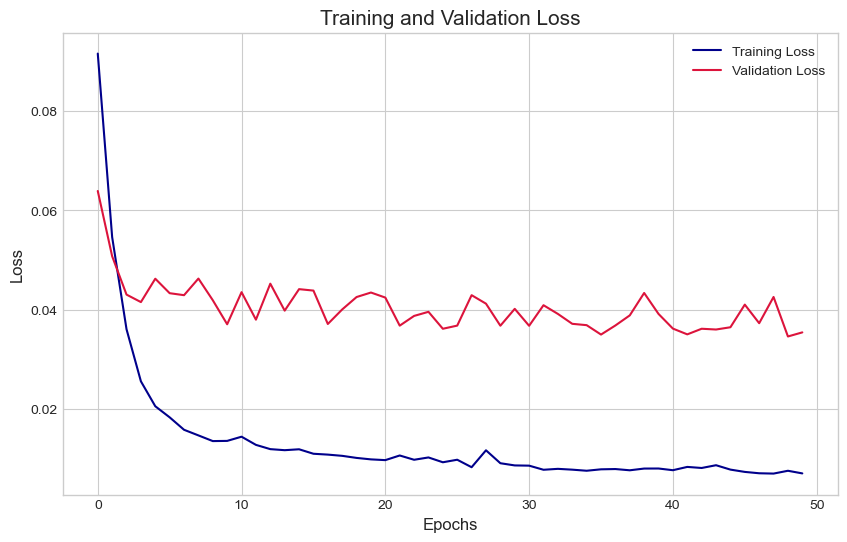

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, concatenate

### 1. 데이터 전처리 (Preprocessing)

# 결측치가 있는 행을 제거합니다.
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# '주변시세 평균' 단위를 '억'에서 '만원'으로 변경
df['주변시세 평균(만원)'] = df['주변시세 평균'] * 10000

# '시세차익' 컬럼 추가 (주변시세 - 분양가)
df['시세차익(만원)'] = df['주변시세 평균(만원)'] - df['분양가(만원)']

# 특성(X)과 타겟(y) 분리
X = df.drop(['분양률', '주변시세 평균'], axis=1)
y = df['분양률']

# 컬럼 타입별로 분류
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object', 'datetime64[ns]']).columns

# ========================= 🔥 수정된 부분 🔥 =========================
# 범주형 데이터 정수 인코딩 및 레이어 생성
cat_inputs = []
embedding_layers = []
vocab_sizes = {}

# enumerate를 사용해 각 컬럼에 고유 번호(i)를 부여
for i, col in enumerate(categorical_cols):
    X[col] = pd.Categorical(X[col]).codes
    vocab_sizes[col] = X[col].max() + 1

    # 한글 컬럼명 대신 고유 번호(i)를 사용해 유효한 레이어 이름을 생성
    cat_input = Input(shape=(1,), name=f'input_cat_{i}')
    embedding = Embedding(input_dim=vocab_sizes[col], output_dim=10, name=f'embedding_cat_{i}')(cat_input)
    flattened = Flatten()(embedding)
    
    cat_inputs.append(cat_input)
    embedding_layers.append(flattened)
# =================================================================

# 수치형 데이터 스케일링
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 입력 데이터 형식으로 분리
X_train_num = X_train[numerical_cols]
X_test_num = X_test[numerical_cols]
X_train_cats = [X_train[col] for col in categorical_cols]
X_test_cats = [X_test[col] for col in categorical_cols]

### 2. 딥러닝 모델 생성 (Build Model)

numerical_input = Input(shape=(len(numerical_cols),), name='input_numerical')
concatenated = concatenate([numerical_input] + embedding_layers)
x = Dense(128, activation='relu')(concatenated)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)
model = Model(inputs=[numerical_input] + cat_inputs, outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.summary()

### 3. 모델 학습 및 평가 (Train & Evaluate)

history = model.fit(
    [X_train_num] + X_train_cats,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

loss, mae = model.evaluate([X_test_num] + X_test_cats, y_test)
print(f"\n테스트 데이터 손실(Loss): {loss:.4f}")
print(f"테스트 데이터 MAE: {mae:.4f}")

### 4. 학습 과정 시각화 (Visualize Training) 📈

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='darkblue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='crimson')
plt.title('Training and Validation Loss', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.show()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_cat_0         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_cat_1         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_cat_2         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_cat_3         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_cat_0     │ (None, 1, 10)     │        140 │ input_cat_0[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_cat_1     │ (None, 1, 10)     │      3,680 │ input_cat_1[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_cat_2     │ (None, 1, 10)     │         50 │ input_cat_2[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_cat_3     │ (None, 1, 10)     │      2,610 │ input_cat_3[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_numerical     │ (None, 28)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_12          │ (None, 10)        │          0 │ embedding_cat_0[… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_13          │ (None, 10)        │          0 │ embedding_cat_1[… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_14          │ (None, 10)        │          0 │ embedding_cat_2[… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_15          │ (None, 10)        │          0 │ embedding_cat_3[… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 68)        │          0 │ input_numerical[… │
│ (Concatenate)       │                   │            │ flatten_12[0][0], │
│                     │                   │            │ flatten_13[0][0], │
│                     │                   │            │ flatten_14[0][0], │
│                     │                   │            │ flatten_15[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 128)       │      8,832 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 23,633 (92.32 KB)

 Trainable params: 23,633 (92.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200


2025-07-18 15:17:59.312287: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.6549 - mae: 1.0695 - val_loss: 0.1802 - val_mae: 0.3292
Epoch 2/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.3621 - mae: 0.4661 - val_loss: 0.1197 - val_mae: 0.2914
Epoch 3/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2667 - mae: 0.4105 - val_loss: 0.0901 - val_mae: 0.2389
Epoch 4/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.2214 - mae: 0.3641 - val_loss: 0.0790 - val_mae: 0.2244
Epoch 5/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2224 - mae: 0.3583 - val_loss: 0.0770 - val_mae: 0.2185
Epoch 6/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1682 - mae: 0.3236 - val_loss: 0.0790 - val_mae: 0.2365
Epoch 7/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1424 - mae: 0.3057 - val_loss: 0.0682 - val_mae: 0.2161
Epoch 8/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1331 - mae: 0.2935 - val_loss: 0.0747 - val_mae: 0.2334
Epoch 9/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1292 -

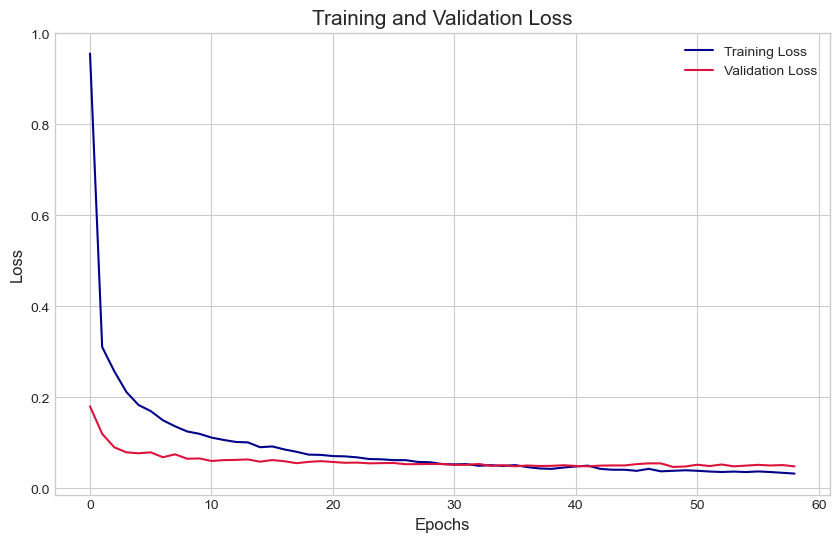

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score  # R2 스코어 계산을 위해 import
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, concatenate, Dropout # Dropout 추가
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping 추가

### 1. 데이터 전처리 (Preprocessing)

df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df['주변시세 평균(만원)'] = df['주변시세 평균'] * 10000
df['시세차익(만원)'] = df['주변시세 평균(만원)'] - df['분양가(만원)']
X = df.drop(['분양률', '주변시세 평균'], axis=1)
y = df['분양률']
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object', 'datetime64[ns]']).columns

cat_inputs = []
embedding_layers = []
vocab_sizes = {}
for i, col in enumerate(categorical_cols):
    X[col] = pd.Categorical(X[col]).codes
    vocab_sizes[col] = X[col].max() + 1
    cat_input = Input(shape=(1,), name=f'input_cat_{i}')
    embedding = Embedding(input_dim=vocab_sizes[col], output_dim=10, name=f'embedding_cat_{i}')(cat_input)
    flattened = Flatten()(embedding)
    cat_inputs.append(cat_input)
    embedding_layers.append(flattened)

scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_num = X_train[numerical_cols]
X_test_num = X_test[numerical_cols]
X_train_cats = [X_train[col] for col in categorical_cols]
X_test_cats = [X_test[col] for col in categorical_cols]

### 2. 딥러닝 모델 개선 (Improved Model)

numerical_input = Input(shape=(len(numerical_cols),), name='input_numerical')
concatenated = concatenate([numerical_input] + embedding_layers)

# 🔥 Dropout 레이어 추가 및 구조 개선
x = Dense(128, activation='relu')(concatenated)
x = Dropout(0.3)(x) # 30%의 뉴런을 비활성화하여 과대적합 방지
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x) # 30%의 뉴런을 비활성화하여 과대적합 방지
output = Dense(1)(x) # 🔥 sigmoid 제거, 순수 회귀 예측

model = Model(inputs=[numerical_input] + cat_inputs, outputs=output)

# 🔥 학습률 조절된 Adam 옵티마이저 사용
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
model.summary()

### 3. 모델 학습 및 평가 (Train & Evaluate)

# 🔥 조기 종료(EarlyStopping) 콜백 설정
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    restore_best_weights=True
)

# 🔥 epochs를 늘리고 early_stopping 콜백 적용
history = model.fit(
    [X_train_num] + X_train_cats,
    y_train,
    epochs=200, # 충분히 많이 설정하고 조기 종료에 맡김
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping], # 콜백 리스트에 추가
    verbose=1
)

# 🔥 모델 성능 평가 (R2 스코어 추가)
loss, mae = model.evaluate([X_test_num] + X_test_cats, y_test, verbose=0)
predictions = model.predict([X_test_num] + X_test_cats, verbose=0).flatten()
r2 = r2_score(y_test, predictions)

print(f"\n테스트 데이터 손실(Loss): {loss:.4f}")
print(f"테스트 데이터 MAE: {mae:.4f}")
print(f"테스트 데이터 R² Score: {r2:.4f}")


### 4. 학습 과정 시각화 (Visualize Training) 📈

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='darkblue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='crimson')
plt.title('Training and Validation Loss', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.show()

In [62]:
df.to_excel('최종_데이터.xlsx', index=False)
df.to_csv('최종_데이터.csv', index=False)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_cat_0         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_cat_1         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_cat_2         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_cat_3         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_cat_0     │ (None, 1, 10)     │        140 │ input_cat_0[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_cat_1     │ (None, 1, 10)     │      3,680 │ input_cat_1[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_cat_2     │ (None, 1, 10)     │         50 │ input_cat_2[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_cat_3     │ (None, 1, 10)     │      2,610 │ input_cat_3[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_numerical     │ (None, 28)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_16          │ (None, 10)        │          0 │ embedding_cat_0[… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_17          │ (None, 10)        │          0 │ embedding_cat_1[… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_18          │ (None, 10)        │          0 │ embedding_cat_2[… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_19          │ (None, 10)        │          0 │ embedding_cat_3[… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 68)        │          0 │ input_numerical[… │
│ (Concatenate)       │                   │            │ flatten_16[0][0], │
│                     │                   │            │ flatten_17[0][0], │
│                     │                   │            │ flatten_18[0][0], │
│                     │                   │            │ flatten_19[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 128)       │      8,832 │ concatenate_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 128)       │          0 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 23,633 (92.32 KB)

 Trainable params: 23,633 (92.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200


2025-07-18 15:57:34.055431: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.5099 - mae: 0.5686 - val_loss: 0.1293 - val_mae: 0.3078
Epoch 2/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2253 - mae: 0.3765 - val_loss: 0.1107 - val_mae: 0.2872
Epoch 3/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2013 - mae: 0.3521 - val_loss: 0.0905 - val_mae: 0.2509
Epoch 4/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1398 - mae: 0.3017 - val_loss: 0.0961 - val_mae: 0.2709
Epoch 5/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1402 - mae: 0.2994 - val_loss: 0.0830 - val_mae: 0.2467
Epoch 6/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1351 - mae: 0.2926 - val_loss: 0.0776 - val_mae: 0.2359
Epoch 7/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1136 - mae: 0.2639 - val_loss: 0.0760 - val_mae: 0.2356
Epoch 8/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1373 - mae: 0.2655 - val_loss: 0.0786 - val_mae: 0.2436
Epoch 9/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1004 -

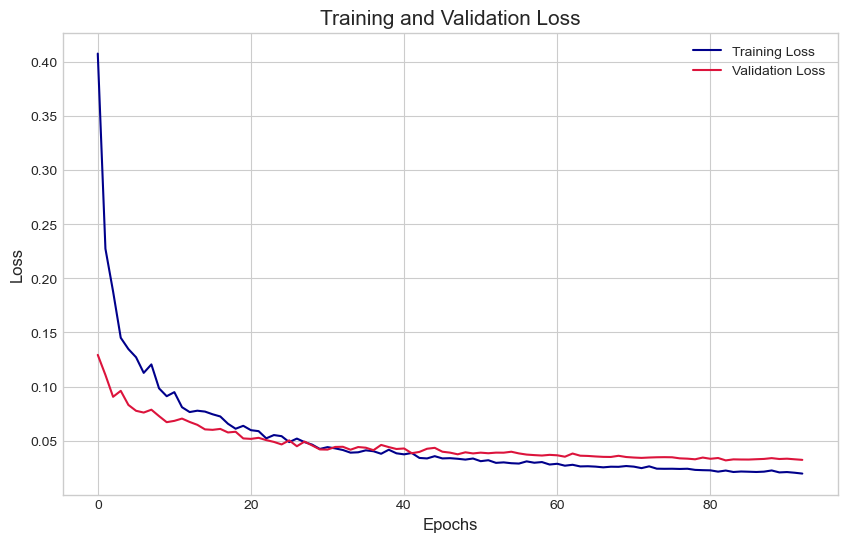

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score  # R2 스코어 계산을 위해 import
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, concatenate, Dropout # Dropout 추가
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping 추가

### 1. 데이터 전처리 (Preprocessing)

df = pd.read_excel('최종_데이터 금리 완화 ver.xlsx')

df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df['주변시세 평균(만원)'] = df['주변시세 평균'] * 10000
df['시세차익(만원)'] = df['주변시세 평균(만원)'] - df['분양가(만원)']
X = df.drop(['분양률', '주변시세 평균'], axis=1)
y = df['분양률']
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object', 'datetime64[ns]']).columns

cat_inputs = []
embedding_layers = []
vocab_sizes = {}
for i, col in enumerate(categorical_cols):
    X[col] = pd.Categorical(X[col]).codes
    vocab_sizes[col] = X[col].max() + 1
    cat_input = Input(shape=(1,), name=f'input_cat_{i}')
    embedding = Embedding(input_dim=vocab_sizes[col], output_dim=10, name=f'embedding_cat_{i}')(cat_input)
    flattened = Flatten()(embedding)
    cat_inputs.append(cat_input)
    embedding_layers.append(flattened)

scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_num = X_train[numerical_cols]
X_test_num = X_test[numerical_cols]
X_train_cats = [X_train[col] for col in categorical_cols]
X_test_cats = [X_test[col] for col in categorical_cols]

### 2. 딥러닝 모델 개선 (Improved Model)

numerical_input = Input(shape=(len(numerical_cols),), name='input_numerical')
concatenated = concatenate([numerical_input] + embedding_layers)

# 🔥 Dropout 레이어 추가 및 구조 개선
x = Dense(128, activation='relu')(concatenated)
x = Dropout(0.3)(x) # 30%의 뉴런을 비활성화하여 과대적합 방지
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x) # 30%의 뉴런을 비활성화하여 과대적합 방지
output = Dense(1)(x) # 🔥 sigmoid 제거, 순수 회귀 예측

model = Model(inputs=[numerical_input] + cat_inputs, outputs=output)

# 🔥 학습률 조절된 Adam 옵티마이저 사용
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
model.summary()

### 3. 모델 학습 및 평가 (Train & Evaluate)

# 🔥 조기 종료(EarlyStopping) 콜백 설정
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    restore_best_weights=True
)

# 🔥 epochs를 늘리고 early_stopping 콜백 적용
history = model.fit(
    [X_train_num] + X_train_cats,
    y_train,
    epochs=200, # 충분히 많이 설정하고 조기 종료에 맡김
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping], # 콜백 리스트에 추가
    verbose=1
)

# 🔥 모델 성능 평가 (R2 스코어 추가)
loss, mae = model.evaluate([X_test_num] + X_test_cats, y_test, verbose=0)
predictions = model.predict([X_test_num] + X_test_cats, verbose=0).flatten()
r2 = r2_score(y_test, predictions)

print(f"\n테스트 데이터 손실(Loss): {loss:.4f}")
print(f"테스트 데이터 MAE: {mae:.4f}")
print(f"테스트 데이터 R² Score: {r2:.4f}")


### 4. 학습 과정 시각화 (Visualize Training) 📈

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='darkblue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='crimson')
plt.title('Training and Validation Loss', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.show()

In [69]:
import pandas as pd

# 1. 분석 결과를 보기 좋은 데이터프레임으로 변환
df_summary = pd.DataFrame({
    '계수(coef)': results.params,
    'p-value': results.pvalues
})

# 2. 통계적으로 유의미한 변수와 유의미하지 않은 변수 분리
# p-value가 0.05 미만이면 유의미하다고 판단합니다.
significant_df = df_summary[df_summary['p-value'] < 0.05].sort_values(by='p-value')
insignificant_df = df_summary[df_summary['p-value'] >= 0.05]

# 3. 변수 이름 보기 좋게 다듬기 (e.g., C(지역)[T.경기도] -> 지역_경기도)
def clean_feature_names(df):
    df.index = df.index.str.replace('C(', '').str.replace(')', '')
    df.index = df.index.str.replace('[T.', '_', regex=False).str.replace(']', '', regex=False)
    # 탭 문자가 포함된 경우 처리 (e.g., '준공\t')
    df.index = df.index.str.replace('\t', '', regex=False)
    # 중복된 밑줄 정리
    df.index = df.index.str.replace('___', '').str.replace('__', '')
    return df

significant_df = clean_feature_names(significant_df)
insignificant_df = clean_feature_names(insignificant_df)

# 4. 최종 결과 출력
print("📊 분양률 예측 모델의 전반적인 성능은 R-squared 기준 약 41%의 설명력을 가집니다.")
print("   아래는 각 변수가 분양률에 미치는 영향에 대한 통계 분석 결과입니다.")

print("\n" + "="*50)
print("✅ 분양률에 유의미한 영향을 미치는 변수들 (p-value < 0.05)")
print("="*50)
display(significant_df)


print("\n" + "="*50)
print("❌ 통계적으로 유의미하지 않은 변수들 (p-value > 0.05)")
print("="*50)
display(insignificant_df)

📊 분양률 예측 모델의 전반적인 성능은 R-squared 기준 약 41%의 설명력을 가집니다.
   아래는 각 변수가 분양률에 미치는 영향에 대한 통계 분석 결과입니다.

✅ 분양률에 유의미한 영향을 미치는 변수들 (p-value < 0.05)


,계수(coef),p-value
미분양수,-4.025841e-03,9.297249e-174
대형쇼핑3km_이내,4.406320e-02,1.342302e-11
세대수,3.835605e-04,3.933693e-08
전용면적,-3.913993e-03,1.134581e-05
준공여부_준공,-2.966760e-01,2.008492e-04
중학교_2km_이내_,-8.034980e-03,2.805760e-04
공급면적,2.405618e-03,5.871075e-04
편의점500m_이내,3.121010e-02,1.000254e-03
버스반경_500m_이내,-1.512950e-02,1.735527e-03
시세차익_만원,1.593099e-07,2.106957e-03



❌ 통계적으로 유의미하지 않은 변수들 (p-value > 0.05)


,계수(coef),p-value
지역_경상남도,6.690711e-02,0.200805
지역_경상북도,1.847682e-02,0.661838
지역_광주광역시,-3.087631e-03,0.948225
지역_대전광역시,2.484562e-02,0.586947
지역_부산광역시,-3.080355e-02,0.444441
지역_인천광역시,2.769647e-03,0.958836
지역_전라남도,7.406913e-02,0.071320
지역_전북특별자치도,4.052425e-02,0.443449
지역_충청남도,1.058722e-01,0.061623
준공여부_미준공,-8.287907e-02,0.080551
